In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns',None)

In [2]:
file_path = 'data.csv'
data = pd.read_csv(file_path)

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [7]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
data.SalePrice.value_counts()

SalePrice
140000    20
135000    17
155000    14
145000    14
190000    13
          ..
202665     1
164900     1
208300     1
181500     1
147500     1
Name: count, Length: 663, dtype: int64

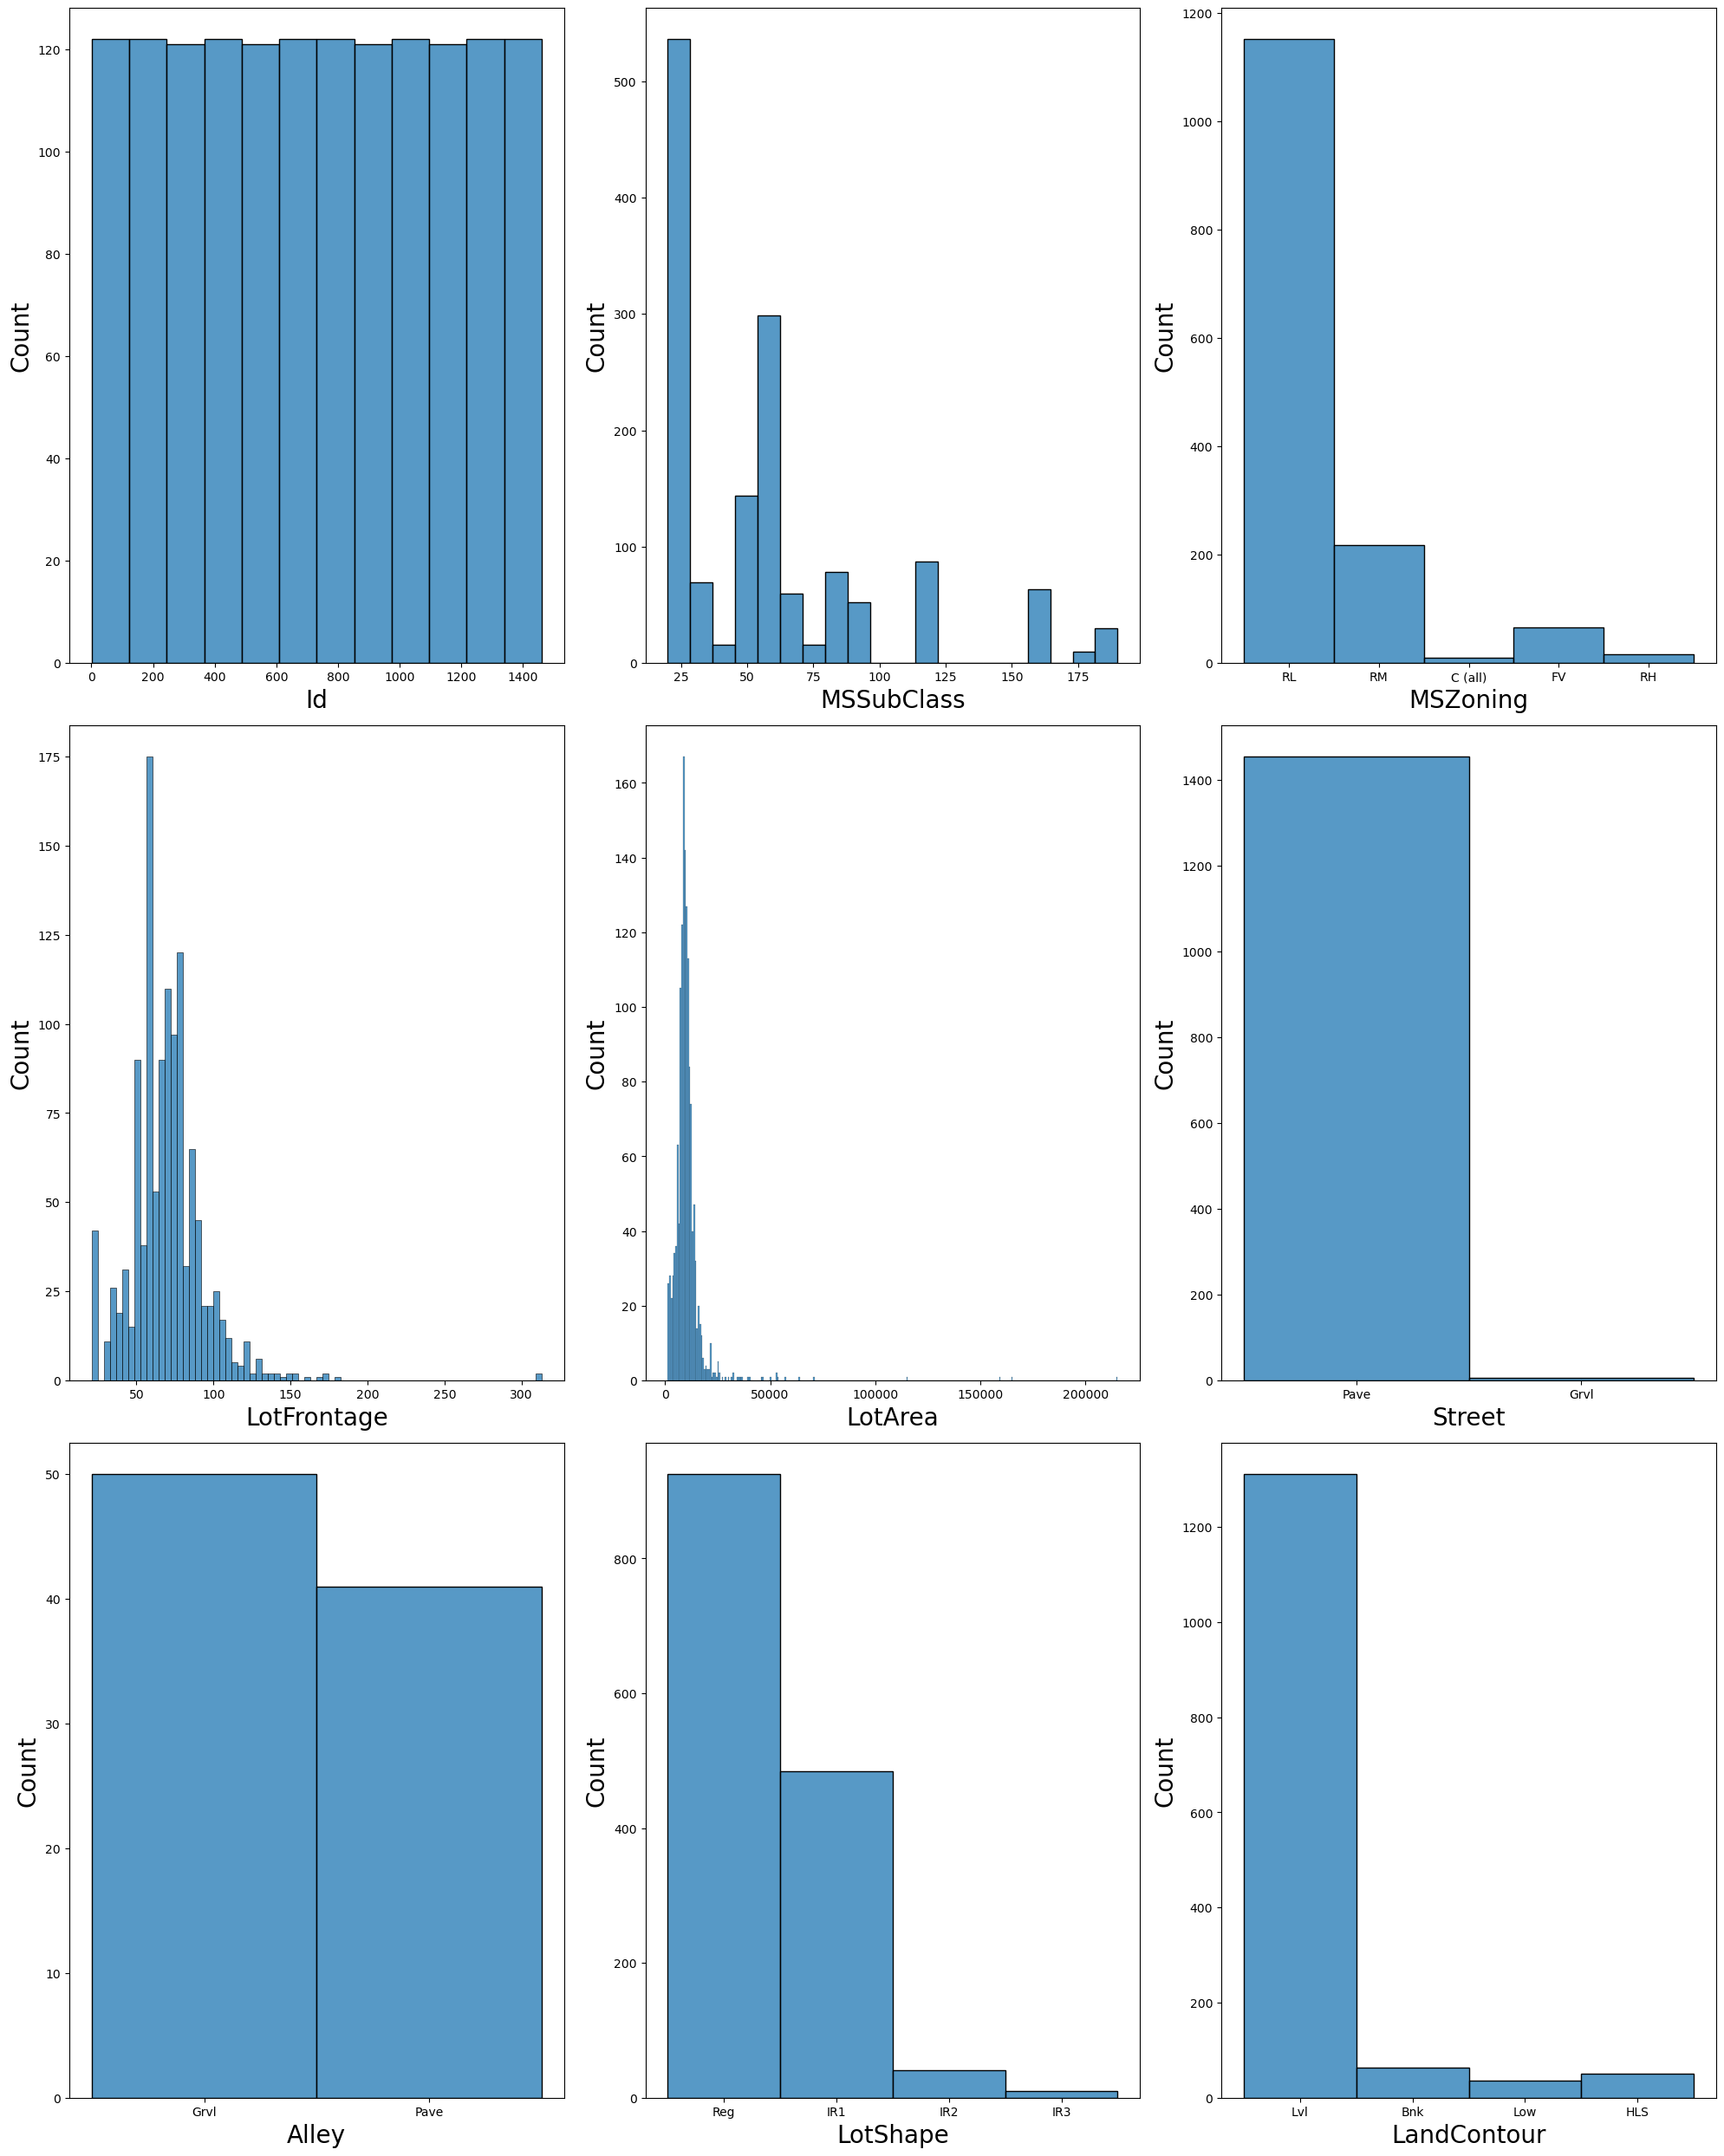

In [9]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()
    

In [10]:
for column in data:
    print(column)

Id
MSSubClass
MSZoning
LotFrontage
LotArea
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice


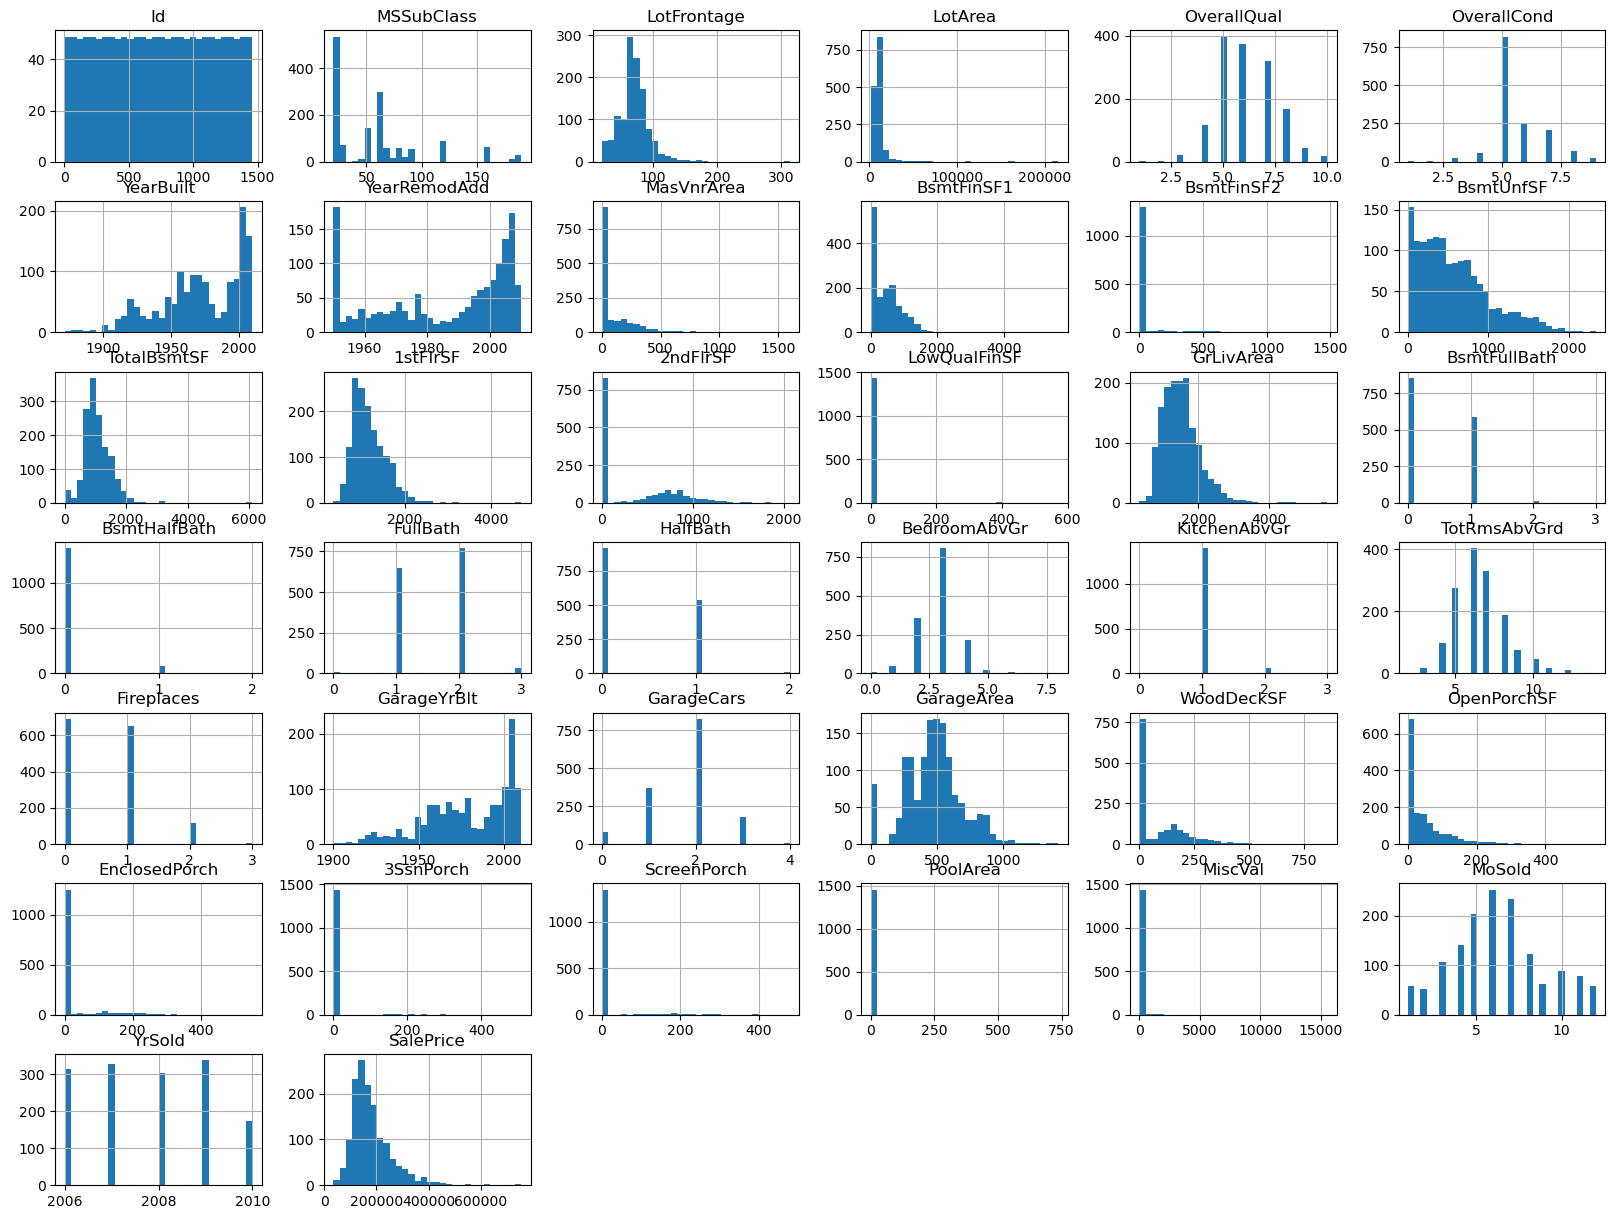

In [11]:
# Univariate Analysis
# Histograms
data.hist(bins=30, figsize=(20, 15))
plt.show()

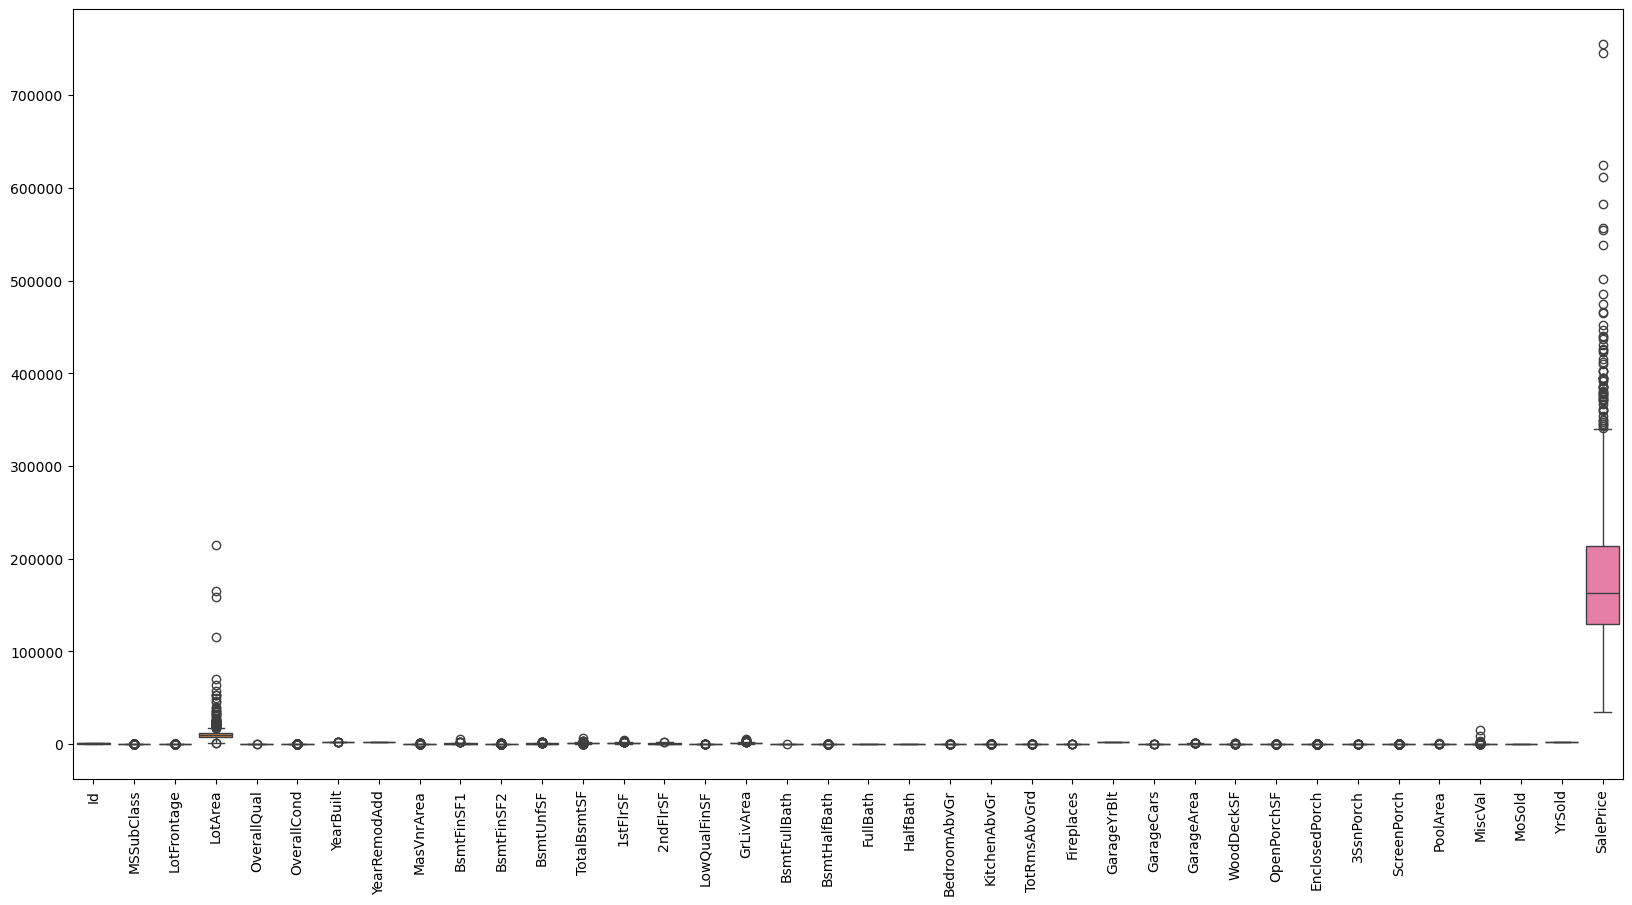

In [12]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

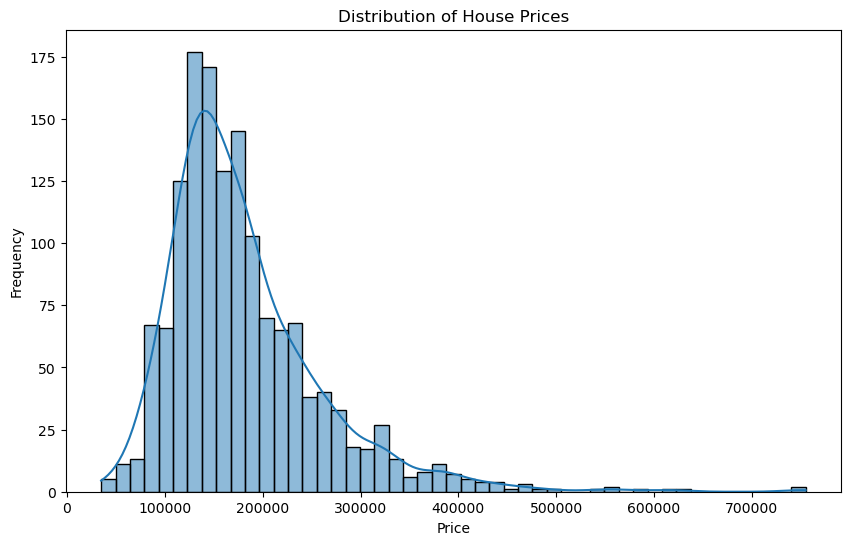

In [13]:
# Visualize the distribution of the target variable (price)
plt.figure(figsize=(10, 6))
sns.histplot(data['SalePrice'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

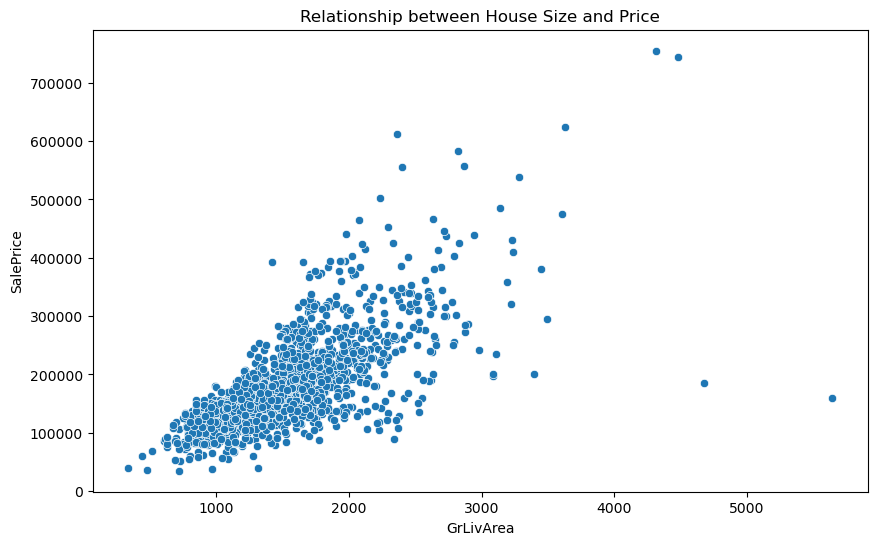

In [14]:
# Relationship between house size and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data)  # Replace with appropriate column names
plt.title('Relationship between House Size and Price')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

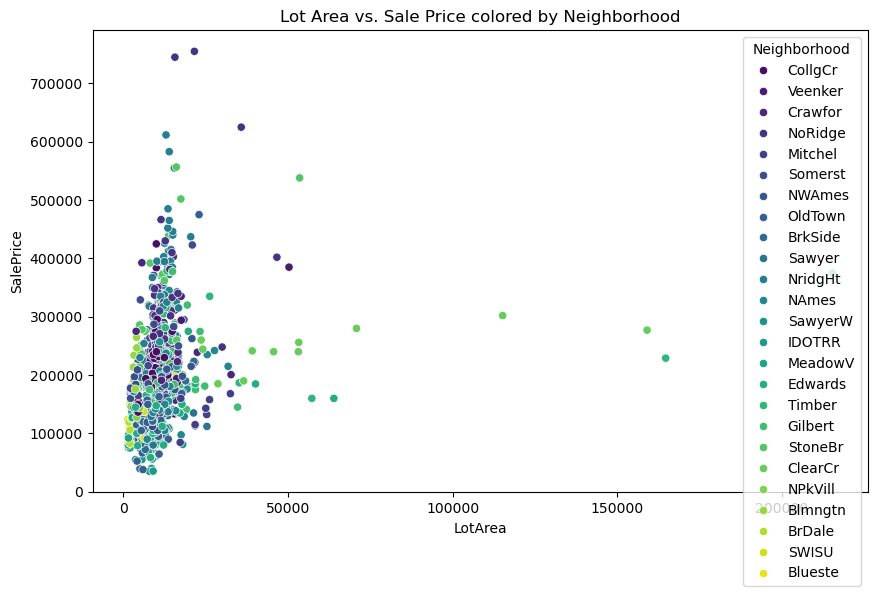

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LotArea', y='SalePrice', data=data, hue='Neighborhood', palette='viridis')
plt.title("Lot Area vs. Sale Price colored by Neighborhood")
plt.show()

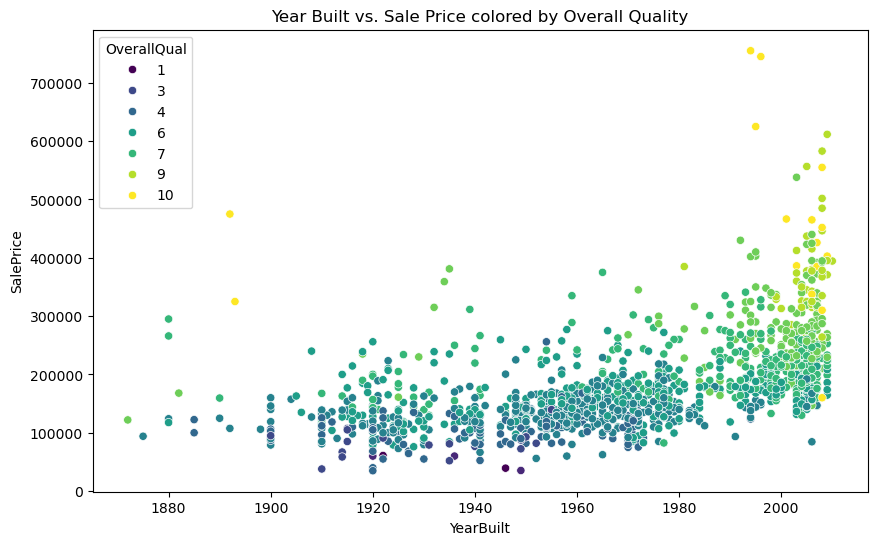

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=data, hue='OverallQual', palette='viridis')
plt.title("Year Built vs. Sale Price colored by Overall Quality")
plt.show()

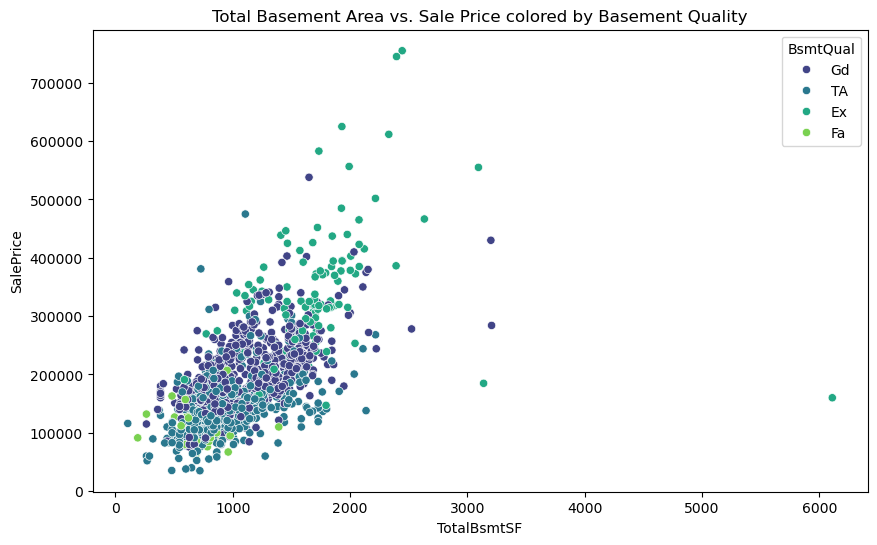

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=data, hue='BsmtQual', palette='viridis')
plt.title("Total Basement Area vs. Sale Price colored by Basement Quality")
plt.show()

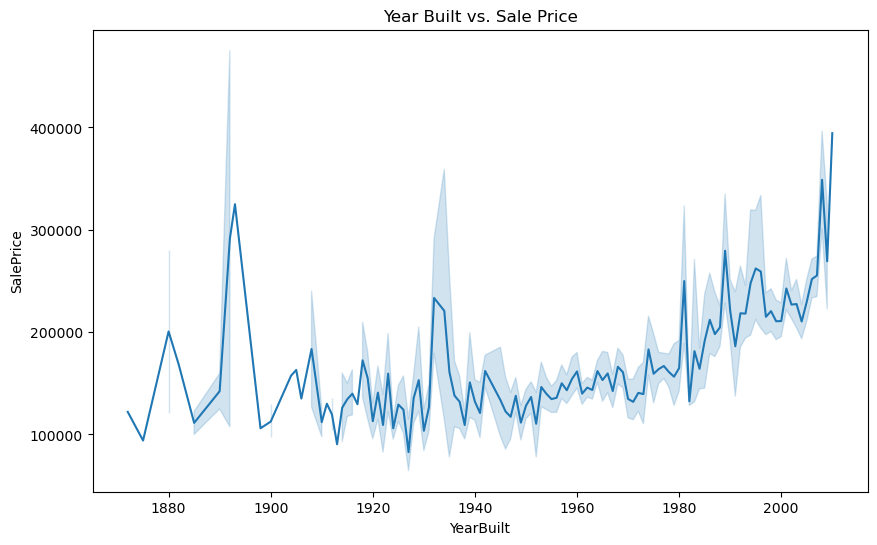

In [18]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='YearBuilt', y='SalePrice', data=data)
plt.title("Year Built vs. Sale Price")
plt.show()

C:\Users\prame\AppData\Local\Temp\ipykernel_7504\1081331446.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_sale_price.index, y=mean_sale_price.values, palette='viridis')


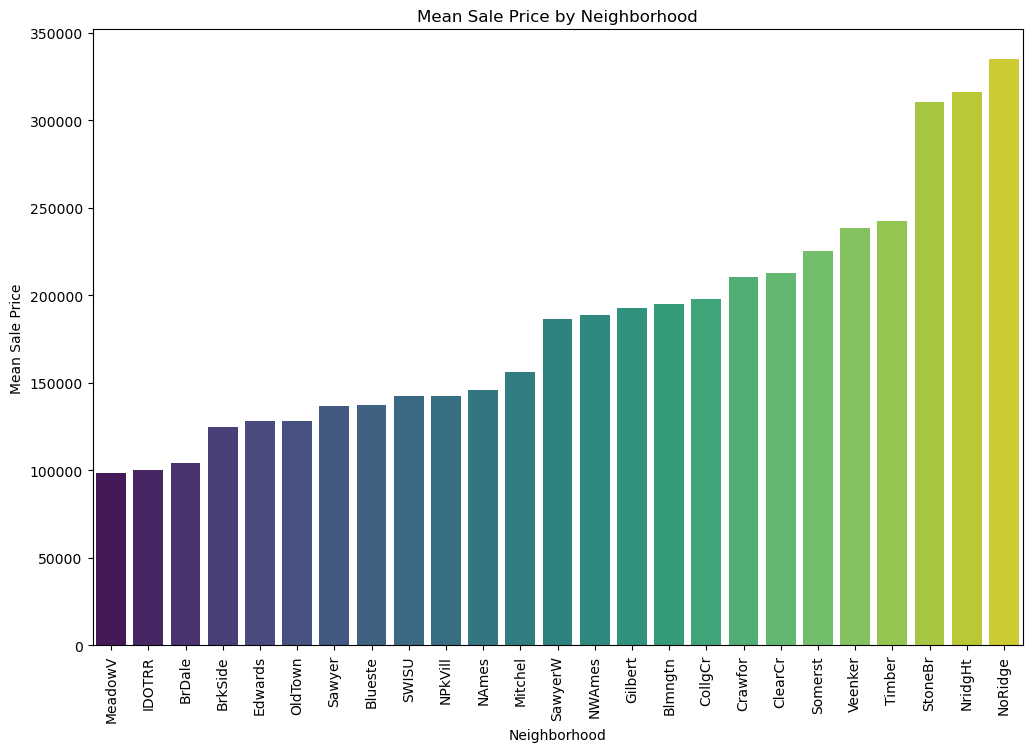

In [19]:
plt.figure(figsize=(12, 8))
mean_sale_price = data.groupby('Neighborhood')['SalePrice'].mean().sort_values()
sns.barplot(x=mean_sale_price.index, y=mean_sale_price.values, palette='viridis')
plt.title("Mean Sale Price by Neighborhood")
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Mean Sale Price')
plt.show()

C:\Users\prame\AppData\Local\Temp\ipykernel_7504\2344768014.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='OverallQual', y='SalePrice', data=data, palette='viridis')


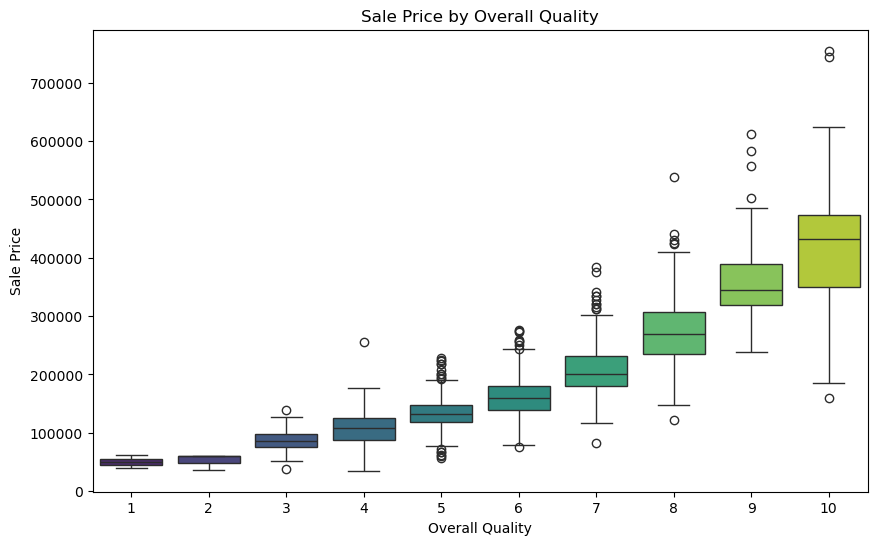

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=data, palette='viridis')
plt.title("Sale Price by Overall Quality")
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

C:\Users\prame\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


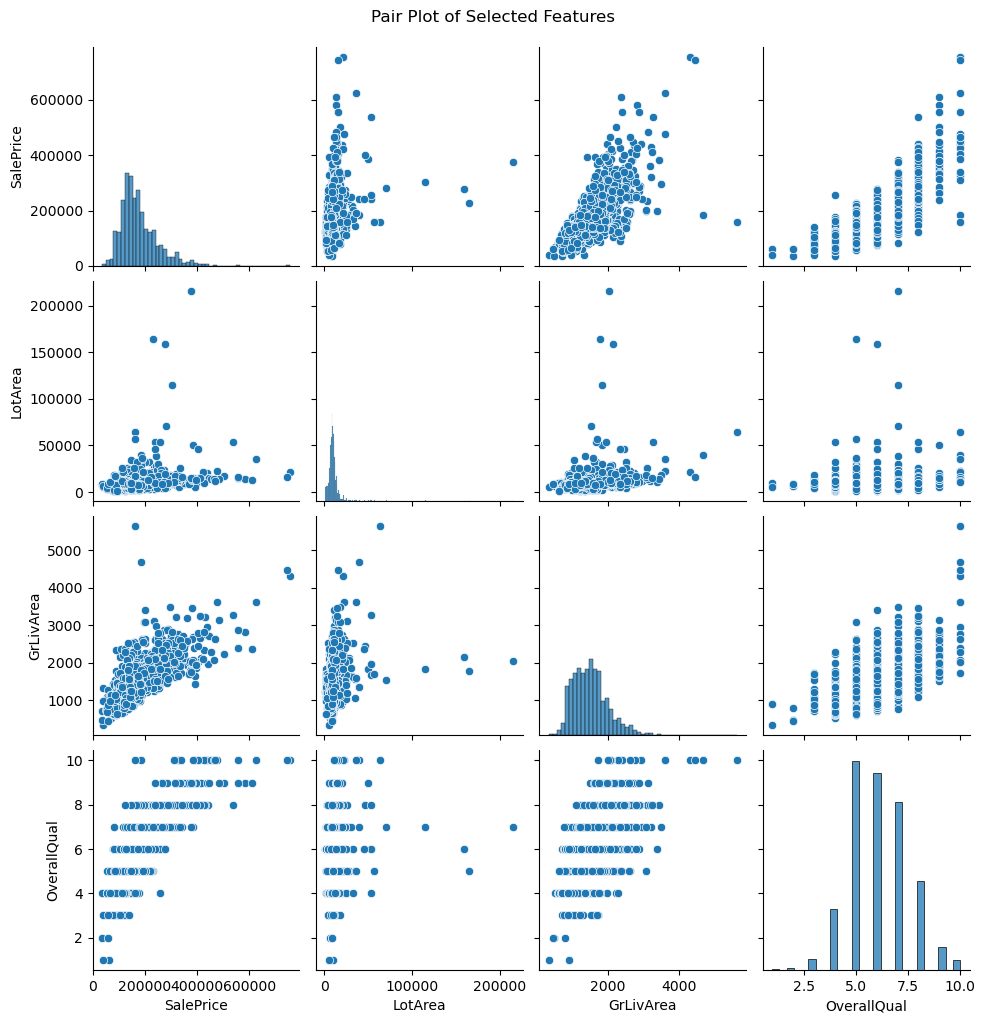

In [21]:
sns.pairplot(data[['SalePrice', 'LotArea', 'GrLivArea', 'OverallQual']])
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()

In [22]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns


In [23]:
# Encode categorical columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [24]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

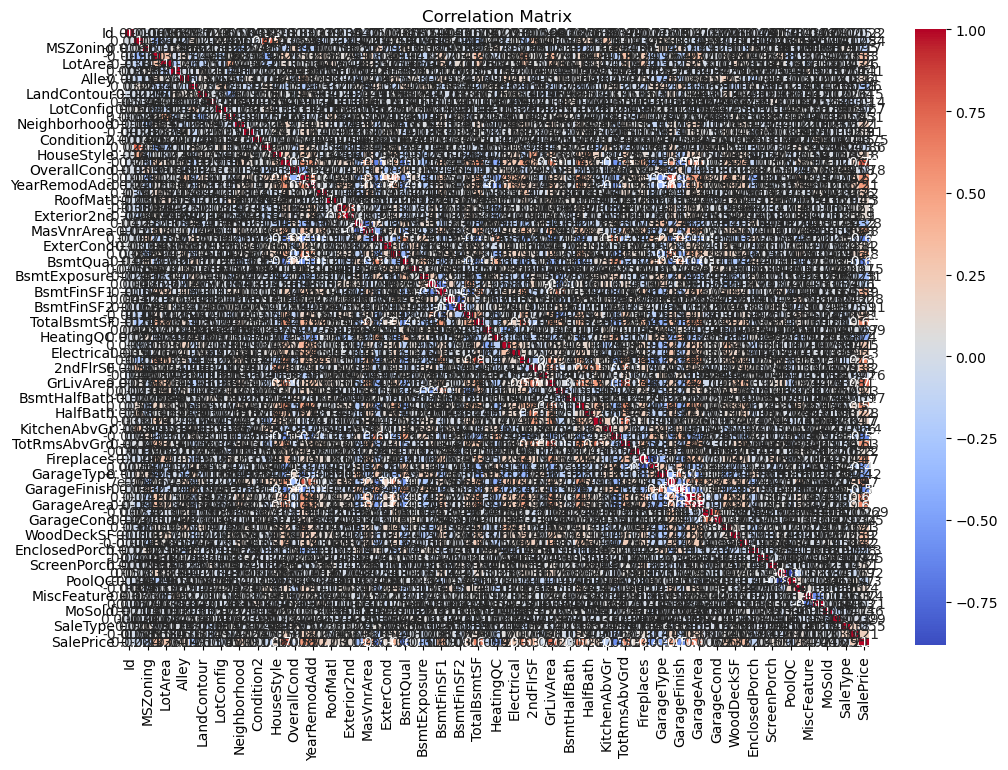

In [25]:
# Visualize correlations between features
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<Axes: >

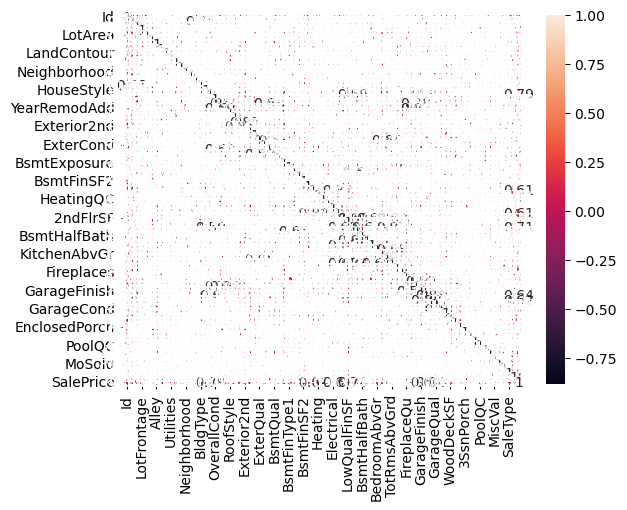

In [26]:
sns.heatmap(data.corr(),annot=True)

In [27]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,3.0,65.0,8450.0,1.0,2.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7.0,5.0,2003.0,2003.0,1.0,1.0,12.0,13.0,1.0,196.0,2.0,4.0,2.0,2.0,3.0,3.0,2.0,706.0,5.0,0.0,150.0,856.0,1.0,0.0,1.0,4.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,2.0,8.0,6.0,0.0,5.0,1.0,2003.0,1.0,2.0,548.0,4.0,4.0,2.0,0.0,61.0,0.0,0.0,0.0,0.0,3.0,4.0,4.0,0.0,2.0,2008.0,8.0,4.0,208500.0
1,2.0,20.0,3.0,80.0,9600.0,1.0,2.0,3.0,3.0,0.0,2.0,0.0,24.0,1.0,2.0,0.0,2.0,6.0,8.0,1976.0,1976.0,1.0,1.0,8.0,8.0,3.0,0.0,3.0,4.0,1.0,2.0,3.0,1.0,0.0,978.0,5.0,0.0,284.0,1262.0,1.0,0.0,1.0,4.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,3.0,6.0,6.0,1.0,4.0,1.0,1976.0,1.0,2.0,460.0,4.0,4.0,2.0,298.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,4.0,0.0,5.0,2007.0,8.0,4.0,181500.0
2,3.0,60.0,3.0,68.0,11250.0,1.0,2.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7.0,5.0,2001.0,2002.0,1.0,1.0,12.0,13.0,1.0,162.0,2.0,4.0,2.0,2.0,3.0,2.0,2.0,486.0,5.0,0.0,434.0,920.0,1.0,0.0,1.0,4.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,2.0,6.0,6.0,1.0,4.0,1.0,2001.0,1.0,2.0,608.0,4.0,4.0,2.0,0.0,42.0,0.0,0.0,0.0,0.0,3.0,4.0,4.0,0.0,9.0,2008.0,8.0,4.0,223500.0
3,4.0,70.0,3.0,60.0,9550.0,1.0,2.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,0.0,5.0,7.0,5.0,1915.0,1970.0,1.0,1.0,13.0,15.0,3.0,0.0,3.0,4.0,0.0,3.0,1.0,3.0,0.0,216.0,5.0,0.0,540.0,756.0,1.0,2.0,1.0,4.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,2.0,7.0,6.0,1.0,2.0,5.0,1998.0,2.0,3.0,642.0,4.0,4.0,2.0,0.0,35.0,272.0,0.0,0.0,0.0,3.0,4.0,4.0,0.0,2.0,2006.0,8.0,0.0,140000.0
4,5.0,60.0,3.0,84.0,14260.0,1.0,2.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,0.0,5.0,8.0,5.0,2000.0,2000.0,1.0,1.0,12.0,13.0,1.0,350.0,2.0,4.0,2.0,2.0,3.0,0.0,2.0,655.0,5.0,0.0,490.0,1145.0,1.0,0.0,1.0,4.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,2.0,9.0,6.0,1.0,4.0,1.0,2000.0,1.0,3.0,836.0,4.0,4.0,2.0,192.0,84.0,0.0,0.0,0.0,0.0,3.0,4.0,4.0,0.0,12.0,2008.0,8.0,4.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,3.0,62.0,7917.0,1.0,2.0,3.0,3.0,0.0,4.0,0.0,8.0,2.0,2.0,0.0,5.0,6.0,5.0,1999.0,2000.0,1.0,1.0,12.0,13.0,3.0,0.0,3.0,4.0,2.0,2.0,3.0,3.0,5.0,0.0,5.0,0.0,953.0,953.0,1.0,0.0,1.0,4.0,953.0,694.0,0.0,1647.0,0.0,0.0,2.0,1.0,3.0,1.0,3.0,7.0,6.0,1.0,4.0,1.0,1999.0,1.0,2.0,460.0,4.0,4.0,2.0,0.0,40.0,0.0,0.0,0.0,0.0,3.0,4.0,4.0,0.0,8.0,2007.0,8.0,4.0,175000.0
1456,1457.0,20.0,3.0,85.0,13175.0,1.0,2.0,3.0,3.0,0.0,4.0,0.0,14.0,2.0,2.0,0.0,2.0,6.0,6.0,1978.0,1988.0,1.0,1.0,9.0,10.0,2.0,119.0,3.0,4.0,1.0,2.0,3.0,3.0,0.0,790.0,4.0,163.0,589.0,1542.0,1.0,4.0,1.0,4.0,2073.0,0.0,0.0,2073.0,1.0,0.0,2.0,0.0,3.0,1.0,3.0,7.0,2.0,2.0,4.0,1.0,1978.0,2.0,2.0,500.0,4.0,4.0,2.0,349.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,4.0,0.0,2.0,2010.0,8.0,4.0,210000.0
1457,1458.0,70.0,3.0,66.0,9042.0,1.0,2.0,3.0,3.0,0.0,4.0,0.0,6.0,2.0,2.0,0.0,5.0,7.0,9.0,1941.0,2006.0,1.0,1.0,5.0,5.0,3.0,0.0,0.0,2.0,4.0,3.0,1.0,3.0,2.0,275.0,5.0,0.0,877.0,1152.0,1.0,0.0,1.0,4.0,1188.0,1152.0,0.0,2340.

In [28]:
# Task 2a: Create a robust machine learning algorithm to predict house prices

# Define features and target variable
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

In [ ]:
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} Performance:")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R^2 Score: {r2}\n")

Linear Regression Performance:
Mean Absolute Error: 21592.24584237542
Mean Squared Error: 1195839709.920928
Root Mean Squared Error: 34580.915400274294
R^2 Score: 0.8440953255937901

Decision Tree Performance:
Mean Absolute Error: 27471.359589041094
Mean Squared Error: 1799174807.9965754
Root Mean Squared Error: 42416.680775333836
R^2 Score: 0.7654369893276844



In [ ]:
# Task 2b: Determine the relationship between house features and price

# Using Random Forest for feature importance
rf_model = models["Random Forest"]
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print("Feature Importances:")
print(feature_importances)

In [ ]:
# Visualize feature importances
plt.figure(figsize=(10, 20))
sns.barplot(x=feature_importances.importance, y=feature_importances.index)
plt.title('Feature Importances')
plt.show()

In [ ]:
# Task 3: Suggestions for customers based on area, price, and other requirements

# Function to suggest houses based on criteria
def suggest_houses(neighborhood=None, max_price=None, min_rooms=None):
    suggestions = data.copy()
    if neighborhood:
        # Encode the neighborhood value for comparison
        encoded_neighborhood = label_encoders['Neighborhood'].transform([neighborhood])[0]
        suggestions = suggestions[suggestions['Neighborhood'] == encoded_neighborhood]
    if max_price:
        suggestions = suggestions[suggestions['SalePrice'] <= max_price]
    if min_rooms:
        suggestions = suggestions[suggestions['TotRmsAbvGrd'] >= min_rooms]
    
    return suggestions

In [ ]:
neighborhood = 'OldTown' 
max_price = 50000
min_rooms = 3

In [ ]:
suggestions = suggest_houses(neighborhood=neighborhood, max_price=max_price, min_rooms=min_rooms)
print("Suggested Houses:")
suggestions


In [ ]:
# Visualize predictions 

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [ ]:
reg= LinearRegression()
reg.fit(X_train, y_train)

In [ ]:
reg.score(X_test, y_test)

In [ ]:
forest= RandomForestRegressor()
forest.fit(X_train, y_train)

In [ ]:
forest.score(X_test, y_test)

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": name, "MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2})

# Create DataFrame for results
results_df = pd.DataFrame(results)

# Model Comparison Report
print("Model Comparison Report")
print(results_df)

In [ ]:
# Report on Challenges Faced
#challenges = 
#Challenges Faced:

#1. Missing Values:
#   - The dataset had missing values in both numerical and categorical columns.
#   - Solution: Used SimpleImputer with 'mean' strategy for numerical columns and 'most frequent' strategy for categorical columns.

#2. Categorical Data Encoding:
#   - Many columns were categorical, which needed to be encoded for model training.
#   - Solution: Used LabelEncoder to convert categorical columns to numerical.

#3. Feature Scaling:
#   - Features needed to be scaled for models like Linear Regression to perform well.
#   - Solution: Used StandardScaler to scale the features.

#4. Model Selection:
#   - Selecting and comparing different models to find the best one for house price prediction.
#   - Solution: Trained and evaluated Linear Regression, Decision Tree, and Random Forest models, and compared their performance.

#5. Interpretation of Results:
#   - Understanding and explaining the model performance metrics.
#   - Solution: Created visualizations to aid in understanding the relationships and distributions in the data.
